In [1]:
# Manipulating the data
import numpy as np
import pandas as pd

# Modelling the data
import sklearn
from sklearn.model_selection import train_test_split

# Oversampling the data
from imblearn.over_sampling import SMOTE

# Normalize the data
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Convolutional Neural Network
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Bidirectional LSTM
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Flatten, Dense, Dropout

# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# model construction
from tensorflow.keras.models import Model

# Performance Analysis
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Exploratory Analysis
import matplotlib.pyplot as plt
import seaborn as sns

# ROC curve Analysis
from sklearn.metrics import roc_curve, auc

## Data Exploration

In [2]:
sample = pd.read_csv('dataset.csv')
sample.head()

,ip,app,device,os,channel,click_time,attributed_time,is_attributed
0,87540,12,1,13,497,2017-11-07 09:30:38,NaN,0
1,105560,25,1,17,259,2017-11-07 13:40:27,NaN,0
2,101424,12,1,19,212,2017-11-07 18:05:24,NaN,0
3,94584,13,1,13,477,2017-11-07 04:58:08,NaN,0
4,68413,12,1,1,178,2017-11-09 09:00:09,NaN,0


In [3]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ip               100000 non-null  int64 
 1   app              100000 non-null  int64 
 2   device           100000 non-null  int64 
 3   os               100000 non-null  int64 
 4   channel          100000 non-null  int64 
 5   click_time       100000 non-null  object
 6   attributed_time  227 non-null     object
 7   is_attributed    100000 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 6.1+ MB


In [4]:
sample.columns

Index(['ip', 'app', 'device', 'os', 'channel', 'click_time', 'attributed_time',
       'is_attributed'],
      dtype='object')

In [5]:
# Finding unique values

def fraction_unique(x):
    return len(sample[x].unique())

unique_values = {x : fraction_unique(x) for x in sample.columns}
unique_values

{'ip': 34857,
 'app': 161,
 'device': 100,
 'os': 130,
 'channel': 161,
 'click_time': 80350,
 'attributed_time': 228,
 'is_attributed': 2}

# Data Pre-Processing

## Transformation of Data

In [6]:
# Creating datetime variables
# takes in a df, adds date/time based columns to it, and returns the modified df

def timeFeatures(df):
    # Derive new features using the click_time column
    df['datetime'] = pd.to_datetime(df['click_time'])
    df['day_of_week'] = df['datetime'].dt.dayofweek
    df['day_of_year'] = df['datetime'].dt.dayofyear
    df['month'] = df['datetime'].dt.month
    df['hour'] =df['datetime'].dt.hour
    return df

In [7]:
# creating new datetime variables and dropping the old ones
dataset_1 = timeFeatures(sample)
dataset_1.drop(['click_time','datetime'], axis=1, inplace=True)
dataset_1.head()

,ip,app,device,os,channel,attributed_time,is_attributed,day_of_week,day_of_year,month,hour
0,87540,12,1,13,497,NaN,0,1,311,11,9
1,105560,25,1,17,259,NaN,0,1,311,11,13
2,101424,12,1,19,212,NaN,0,1,311,11,18
3,94584,13,1,13,477,NaN,0,1,311,11,4
4,68413,12,1,1,178,NaN,0,3,313,11,9


In [8]:
# Creating datetime variables
# takes in a df, adds date/time based columns to it, and returns the modified df

def timeFeatures1(df):
    # Derive new features using the click_time column
    df['datetime_1'] = pd.to_datetime(df['attributed_time'])
    df['day_of_week_1'] = df['datetime_1'].dt.dayofweek
    df['day_of_year_1'] = df['datetime_1'].dt.dayofyear
    df['month_1'] = df['datetime_1'].dt.month
    df['hour_1'] =df['datetime_1'].dt.hour
    return df

In [9]:
# creating new datetime variables and dropping the old ones
dataset_2 = timeFeatures1(dataset_1)
dataset_2.drop(['attributed_time','datetime_1'], axis=1, inplace=True)
dataset_2.head()

,ip,app,device,os,channel,is_attributed,day_of_week,day_of_year,month,hour,day_of_week_1,day_of_year_1,month_1,hour_1
0,87540,12,1,13,497,0,1,311,11,9,NaN,NaN,NaN,NaN
1,105560,25,1,17,259,0,1,311,11,13,NaN,NaN,NaN,NaN
2,101424,12,1,19,212,0,1,311,11,18,NaN,NaN,NaN,NaN
3,94584,13,1,13,477,0,1,311,11,4,NaN,NaN,NaN,NaN
4,68413,12,1,1,178,0,3,313,11,9,NaN,NaN,NaN,NaN


## Removing Null values

In [10]:
# Optional
dataset_2.isnull().sum()

ip                   0
app                  0
device               0
os                   0
channel              0
is_attributed        0
day_of_week          0
day_of_year          0
month                0
hour                 0
day_of_week_1    99773
day_of_year_1    99773
month_1          99773
hour_1           99773
dtype: int64

In [11]:
# Optional
dataset_3 = dataset_2.fillna(0)
dataset_3.isnull().sum()

ip               0
app              0
device           0
os               0
channel          0
is_attributed    0
day_of_week      0
day_of_year      0
month            0
hour             0
day_of_week_1    0
day_of_year_1    0
month_1          0
hour_1           0
dtype: int64

## Balancing the Fraud clicks and Non-Fraud clicks

In [12]:
dataset_3['is_attributed'].value_counts()

0    99773
1      227
Name: is_attributed, dtype: int64

In [13]:
fraud_click = dataset_3[dataset_3['is_attributed']==1]
non_fraud_click = dataset_3[dataset_3['is_attributed']==0]

In [14]:
fraud_click.shape, non_fraud_click.shape

((227, 14), (99773, 14))

In [15]:
non_fraud_sample = non_fraud_click.sample(n=227)

In [16]:
non_fraud_sample.shape

(227, 14)

In [17]:
dataset = fraud_click.append(non_fraud_sample, ignore_index=True)

C:\Users\itsme\AppData\Local\Temp\ipykernel_4264\982309498.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  dataset = fraud_click.append(non_fraud_sample, ignore_index=True)


In [18]:
dataset.head()

,ip,app,device,os,channel,is_attributed,day_of_week,day_of_year,month,hour,day_of_week_1,day_of_year_1,month_1,hour_1
0,224120,19,0,29,213,1,2,312,11,2,2.0,312.0,11.0,2.0
1,272894,10,1,7,113,1,2,312,11,6,2.0,312.0,11.0,6.0
2,79001,19,0,0,213,1,1,311,11,9,1.0,311.0,11.0,11.0
3,131029,19,0,0,343,1,3,313,11,10,3.0,313.0,11.0,11.0
4,40352,19,0,0,213,1,1,311,11,22,2.0,312.0,11.0,1.0


## Data Normalization

In [19]:
x = dataset.drop(labels=['is_attributed'], axis = 1)

In [20]:
y = dataset['is_attributed']

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [22]:
x_train.shape, x_test.shape

((363, 13), (91, 13))

In [23]:
y_train.shape, y_test.shape

((363,), (91,))

In [24]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [25]:
x_train

array([[ 1.2842926 ,  0.22418994, -0.10231836, ...,  1.00370855,
         1.00275863, -0.58586044],
       [-1.24057023, -0.12704419, -0.1081163 , ...,  1.01012185,
         1.00275863, -0.41310062],
       [-0.9630435 , -0.16216761, -0.10231836, ...,  1.00370855,
         1.00275863, -0.75862026],
       ...,
       [ 1.29198535,  0.78616456, -0.10231836, ...,  1.00370855,
         1.00275863,  1.66001724],
       [ 1.47607409,  1.73449673, -0.10231836, ...,  1.00370855,
         1.00275863,  1.48725742],
       [-0.56439908,  0.43493043, -0.10231836, ...,  1.00370855,
         1.00275863, -0.58586044]])

## Data Re-sampling

**_Now we need to apply SMOTE technique for oversampling the unbalanced data to convert into balanced data._**

In [26]:
unique, count = np.unique(y_train, return_counts=True)
y_train_dict_value_count = { k:v for (k,v) in zip(unique, count)}
y_train_dict_value_count

{0: 182, 1: 181}

In [27]:
sm = SMOTE(random_state=42)
x_train_res, y_train_res = sm.fit_resample(x_train, y_train)

In [28]:
unique, count = np.unique(y_train, return_counts=True)
y_train_dict_value_count = { k:v for (k,v) in zip(unique, count)}
y_train_dict_value_count

{0: 182, 1: 181}

# 1) General CNN Architecture

In [29]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [30]:
y_train.shape, y_test.shape

((363,), (91,))

In [31]:
x_train.shape, x_test.shape

((363, 13), (91, 13))

In [32]:
x_train_res = x_train.reshape(363, 13, 1)
x_test_res = x_test.reshape(91, 13, 1)

In [33]:
x_train_res.shape, x_test_res.shape

((363, 13, 1), (91, 13, 1))

In [34]:
model = tf.keras.models.Sequential()

In [35]:
# First CNN Layer
model.add(tf.keras.layers.Conv1D(filters=32, kernel_size = 2, padding='same', activation='relu', input_shape=(13,1)))

model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.MaxPool1D(pool_size=2))

model.add(tf.keras.layers.Dropout(0.2))

C:\Users\itsme\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [36]:
# Second CNN Layer
model.add(tf.keras.layers.Conv1D(filters=64, kernel_size = 2, padding='same', activation='relu'))

model.add(tf.keras.layers.BatchNormalization())

model.add(tf.keras.layers.MaxPool1D(pool_size=2))

model.add(tf.keras.layers.Dropout(0.3))

In [37]:
# Flatten Layer
model.add(tf.keras.layers.Flatten())

In [38]:
# Final Dense layer
model.add(tf.keras.layers.Dense(units=64, activation='relu'))

model.add(tf.keras.layers.Dropout(0.3))

In [39]:
# Output layer
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [40]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 13, 32)              │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 13, 32)              │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 6, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 6, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 6, 64)               │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 6, 64)               │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 3, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 3, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 192)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          12,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 17,057 (66.63 KB)

 Trainable params: 16,865 (65.88 KB)

 Non-trainable params: 192 (768.00 B)

In [41]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [42]:
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [43]:
history_CNN = model.fit(x_train, y_train, epochs=25, validation_data=(x_test, y_test))

Epoch 1/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 49ms/step - accuracy: 0.3119 - loss: 1.6388 - val_accuracy: 0.4066 - val_loss: 0.7285
Epoch 2/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.3560 - loss: 1.3845 - val_accuracy: 0.6264 - val_loss: 0.6975
Epoch 3/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.5280 - loss: 1.0002 - val_accuracy: 0.8022 - val_loss: 0.6651
Epoch 4/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5403 - loss: 0.9465 - val_accuracy: 0.8132 - val_loss: 0.6328
Epoch 5/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7054 - loss: 0.6561 - val_accuracy: 0.8681 - val_loss: 0.6043
Epoch 6/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7753 - loss: 0.5019 - val_accuracy: 0.9011 - val_loss: 0.5778
Epoch 7/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7933 - loss: 0.4881 - val_accuracy: 0.9121 - val_loss: 0.5506
Epoch 8/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8382 - loss: 0.4080 - val_accuracy: 0.9560 - v

In [44]:
cnn_train = model.predict(x_train)
cnn_test = model.predict(x_test)


# Initialize and train Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=200, random_state=42)
rf_classifier.fit(cnn_train, y_train)

# Make predictions using Random Forest classifier
predictions_cnn = rf_classifier.predict(cnn_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


# 2) GENERAL BiLSTM ARCHITECTURE

In [45]:
model = tf.keras.models.Sequential()

In [46]:
# First BiLSTM Layer
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=32, return_sequences=True), input_shape=(13, 1)))

model.add(tf.keras.layers.BatchNormalization())

C:\Users\itsme\anaconda3\lib\site-packages\keras\src\layers\core\wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [47]:
# Second BiLSTM Layer
model.add(tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(units=64, return_sequences=True)))

model.add(tf.keras.layers.BatchNormalization())

In [48]:
# Flatten Layer
model.add(tf.keras.layers.Flatten())

In [49]:
# First Dense layer
model.add(tf.keras.layers.Dense(units=64, activation='relu'))

model.add(tf.keras.layers.Dropout(0.3))

In [50]:
# Output layer
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [51]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional (Bidirectional)        │ (None, 13, 64)              │           8,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 13, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 13, 128)             │          66,048 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 13, 128)             │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1664)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │         106,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 182,145 (711.50 KB)

 Trainable params: 181,761 (710.00 KB)

 Non-trainable params: 384 (1.50 KB)

In [52]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [53]:
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [54]:
history_BiLSTM = model.fit(x_train, y_train, epochs=25, validation_data=(x_test, y_test))

Epoch 1/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 14s 146ms/step - accuracy: 0.8618 - loss: 0.3282 - val_accuracy: 1.0000 - val_loss: 0.6424
Epoch 2/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9953 - loss: 0.0289 - val_accuracy: 1.0000 - val_loss: 0.6184
Epoch 3/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 1.0000 - loss: 0.0093 - val_accuracy: 1.0000 - val_loss: 0.6018
Epoch 4/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 1.0000 - loss: 0.0086 - val_accuracy: 1.0000 - val_loss: 0.5871
Epoch 5/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 1.0000 - loss: 0.0069 - val_accuracy: 1.0000 - val_loss: 0.5723
Epoch 6/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 1.0000 - loss: 0.0033 - val_accuracy: 1.0000 - val_loss: 0.5551
Epoch 7/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 1.0000 - loss: 0.0038 - val_accuracy: 1.0000 - val_loss: 0.5378
Epoch 8/25
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 1.0000 - loss: 0.0030 - val_accuracy: 1.0000 -

In [55]:
bilstm_train = model.predict(x_train)
bilstm_test = model.predict(x_test)


# Initialize and train Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=200, random_state=42)
rf_classifier.fit(bilstm_train, y_train)

# Make predictions using Random Forest classifier
predictions_bilstm = rf_classifier.predict(bilstm_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 112ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


# 3) CNN-BiLSTM

In [56]:
# Reshape the arrays
X_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
X_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

# Define the CNN-BiLSTM-RF model
model = Sequential()

# 1-D CNN layer
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(13,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(BatchNormalization())

# BiLSTM layer
model.add(Bidirectional(LSTM(units=128, return_sequences=True)))
model.add(MaxPooling1D(pool_size=2))
model.add(BatchNormalization())

# Flatten layer
model.add(Flatten())

# Dense layers
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.5))

# Output layer for RF classification
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_CNN_BiLSTM = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

C:\Users\itsme\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 224ms/step - accuracy: 0.6766 - loss: 4.0820 - val_accuracy: 0.4945 - val_loss: 1.8092
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9042 - loss: 1.0405 - val_accuracy: 0.4945 - val_loss: 1.1685
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9711 - loss: 0.3666 - val_accuracy: 0.4945 - val_loss: 1.3238
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9773 - loss: 0.3121 - val_accuracy: 0.5165 - val_loss: 1.0192
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9497 - loss: 0.5094 - val_accuracy: 0.5165 - val_loss: 0.7914
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9840 - loss: 0.1863 - val_accuracy: 0.5275 - val_loss: 0.6376
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9619 - loss: 0.3461 - val_accuracy: 0.5495 - val_loss: 0.5601
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.9992 - loss: 0.0209 - val_accuracy: 0.5824 - val_loss: 0.492

In [57]:
cnn_bilstm_train = model.predict(X_train)
cnn_bilstm_test = model.predict(X_test)


# Initialize and train Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=200, random_state=42)
rf_classifier.fit(cnn_bilstm_train, y_train)

# Make predictions using Random Forest classifier
predictions_cnn_bilstm = rf_classifier.predict(cnn_bilstm_test)

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 


# 4) WORKFLOW MODEL OF RANDOM FOREST

In [58]:
# Create the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(x_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 1.0


# 5) CNN-BiLSTM-RF ARCHITECTURE

In [59]:
x_train.shape, x_test.shape

((363, 13), (91, 13))

In [60]:
# Reshape the arrays
X_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
X_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

# Define the CNN-BiLSTM-RF model
model = Sequential()

# 1-D CNN layer
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(13,1)))
model.add(MaxPooling1D(pool_size=2))
model.add(BatchNormalization())

# BiLSTM layer
model.add(Bidirectional(LSTM(units=128, return_sequences=True)))
model.add(MaxPooling1D(pool_size=2))
model.add(BatchNormalization())

# Flatten layer
model.add(Flatten())

# Dense layers
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(0.5))

# Output layer for RF classification
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history_CNN_BiLSTM_RF = model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

cnn_bilstm_RF_train = model.predict(X_train)
cnn_bilstm_RF_test = model.predict(X_test)

# Initialize and train Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=200, random_state=42)
rf_classifier.fit(cnn_bilstm_RF_train, y_train)

# Make predictions using Random Forest classifier
predictions_cnn_bilstm_rf = rf_classifier.predict(cnn_bilstm_RF_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions_cnn_bilstm_rf)
print("Accuracy:", accuracy)

C:\Users\itsme\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 10s 216ms/step - accuracy: 0.7533 - loss: 3.0742 - val_accuracy: 0.4945 - val_loss: 0.9694
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9515 - loss: 0.5359 - val_accuracy: 0.5165 - val_loss: 0.6917
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9663 - loss: 0.3673 - val_accuracy: 0.5604 - val_loss: 0.5149
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9838 - loss: 0.2319 - val_accuracy: 0.6484 - val_loss: 0.4101
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.9895 - loss: 0.0820 - val_accuracy: 0.8352 - val_loss: 0.2876
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9975 - loss: 0.0417 - val_accuracy: 0.9451 - val_loss: 0.2034
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9929 - loss: 0.1122 - val_accuracy: 0.9890 - val_loss: 0.1470
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - accuracy: 0.9954 - loss: 0.0786 - val_accuracy: 1.0000 - val_loss: 0.110

## Fradulent and Non-Fradulent Clicks

In [61]:
# Extract fraudulent and non-fraudulent clicks
fraudulent_clicks = X_test[predictions_cnn_bilstm_rf == 1]
non_fraudulent_clicks = X_test[predictions_cnn_bilstm_rf == 0]

# Print the number of fraudulent and non-fraudulent clicks
print("Number of fraudulent clicks:", len(fraudulent_clicks))
print("Number of Real clicks:", len(non_fraudulent_clicks))

Number of fraudulent clicks: 47
Number of Real clicks: 44


## Exploratory Analysis

In [62]:
dataset.columns

Index(['ip', 'app', 'device', 'os', 'channel', 'is_attributed', 'day_of_week',
       'day_of_year', 'month', 'hour', 'day_of_week_1', 'day_of_year_1',
       'month_1', 'hour_1'],
      dtype='object')

In [63]:
columns_to_remove = ['month','day_of_week_1', 'day_of_year_1', 'day_of_year_1', 'month_1', 'hour_1']
dataset.drop(columns=columns_to_remove, inplace=True)

In [64]:
filtered_dataset = dataset[dataset['is_attributed'] == 0]

filtered_dataset

,ip,app,device,os,channel,is_attributed,day_of_week,day_of_year,hour
227,185608,3,1,13,280,0,1,311,23
228,47293,12,2,28,265,0,2,312,9
229,26995,2,1,10,219,0,0,310,22
230,121060,3,2,49,137,0,3,313,5
231,69395,3,1,25,452,0,3,313,10
...,...,...,...,...,...,...,...,...,...
449,110211,9,1,13,232,0,2,312,2
450,86611,2,1,13,477,0,3,313,15
451,22723,3,1,12,280,0,2,312,14
452,40639,3,1,41,424,0,3,313,8


>**Hourly Clicks**

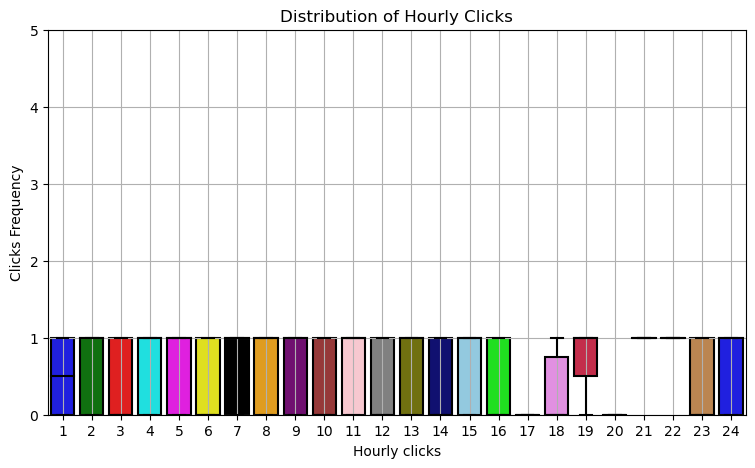

In [65]:
# Define colors for each box plot
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'navy', 'skyblue', 'lime', 'teal', 'violet', 'crimson', 'indigo', 'salmon', 'gold', 'peru']

# Create a box plot with custom colors using Seaborn
plt.figure(figsize=(9, 5))
sns.boxplot(x='hour', y='is_attributed', data=dataset, palette=colors)

# Customize plot labels and limits
plt.title('Distribution of Hourly Clicks')
plt.xlabel('Hourly clicks')
plt.ylabel('Clicks Frequency')
plt.xticks(range(0, 24), range(1, 25))
plt.ylim(0, 5)  # Set y-axis limits
plt.grid(True)
plt.show()

>**Weekly clicks**

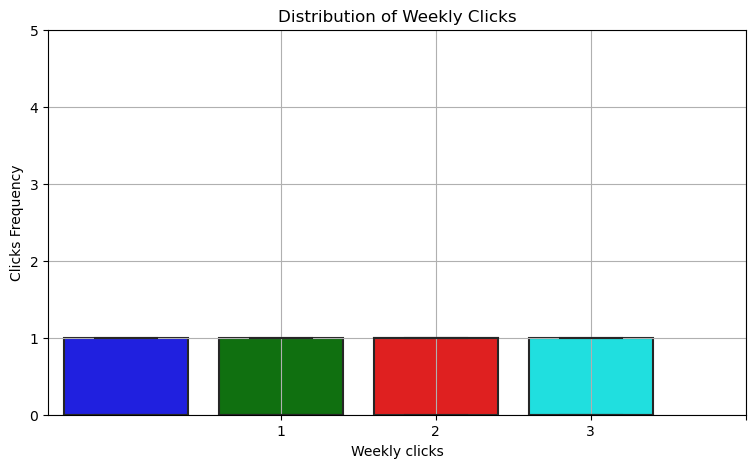

In [66]:
# Define colors for each box plot
colors = ['blue', 'green', 'red', 'cyan']

# Create a box plot with custom colors using Seaborn
plt.figure(figsize=(9, 5))
sns.boxplot(x='day_of_week', y='is_attributed', data=dataset, palette=colors)

# Customize plot labels and limits
plt.title('Distribution of Weekly Clicks')
plt.xlabel('Weekly clicks')
plt.ylabel('Clicks Frequency')
plt.xticks(range(1, 5))
plt.ylim(0, 5)  # Set y-axis limits
plt.grid(True)
plt.show()

>**Correlation analysis of temporal patterns with respect to target attribute.**

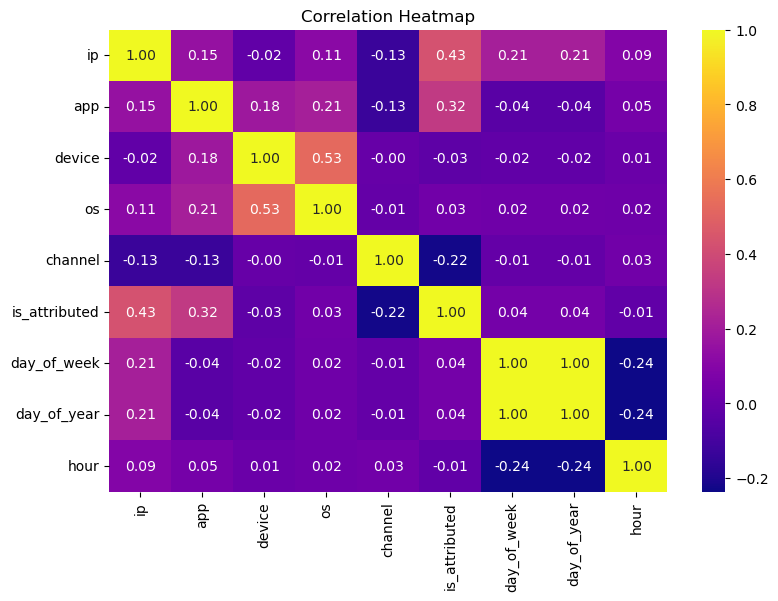

In [67]:
correlation_matrix = dataset.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(9, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="plasma", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

## EXPERIMENTAL ENVIRONMENT, AND RESULTS ANALYSIS

### 1) Performance Analysis

**Confusion Matrix for CNN, BiLSTM, CNN-BiLSTM, CNN-BiLSTM-RF**

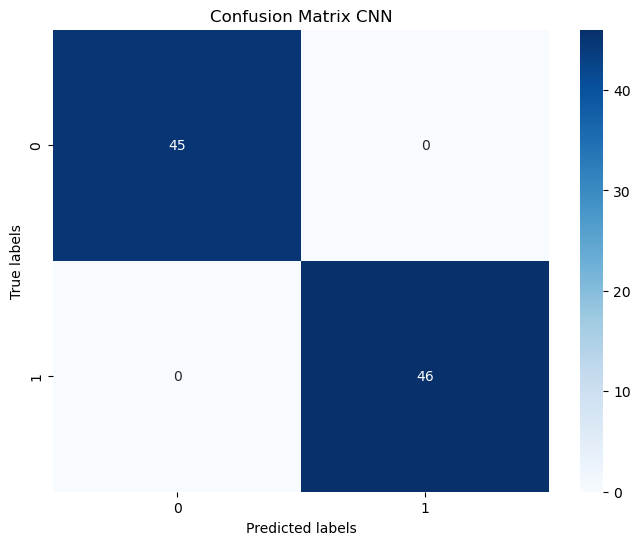

In [68]:
confusion_matrix_cnn = confusion_matrix(y_test, predictions_cnn)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_cnn, annot=True, cmap='Blues', fmt='d', cbar=True)

# Add labels, title, and ticks
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix CNN')
plt.xticks(ticks=np.arange(len(confusion_matrix_cnn))+0.5, labels=np.unique(y_test))
plt.yticks(ticks=np.arange(len(confusion_matrix_cnn))+0.5, labels=np.unique(y_test))
plt.show()

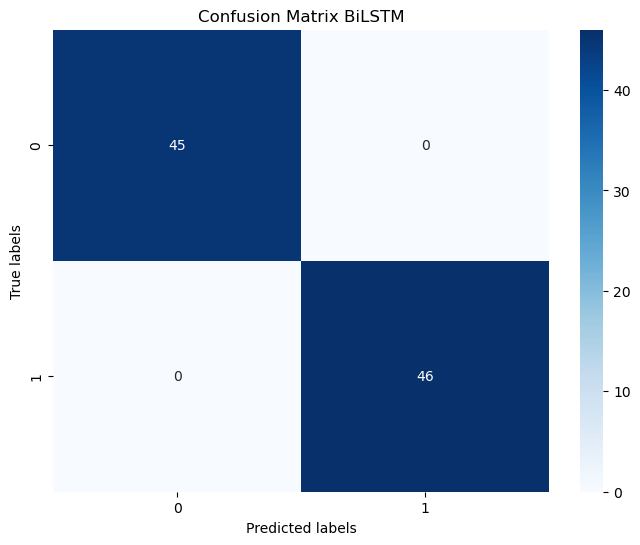

In [69]:
confusion_matrix_bilstm = confusion_matrix(y_test, predictions_bilstm)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_bilstm, annot=True, cmap='Blues', fmt='d', cbar=True)

# Add labels, title, and ticks
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix BiLSTM')
plt.xticks(ticks=np.arange(len(confusion_matrix_bilstm))+0.5, labels=np.unique(y_test))
plt.yticks(ticks=np.arange(len(confusion_matrix_bilstm))+0.5, labels=np.unique(y_test))
plt.show()

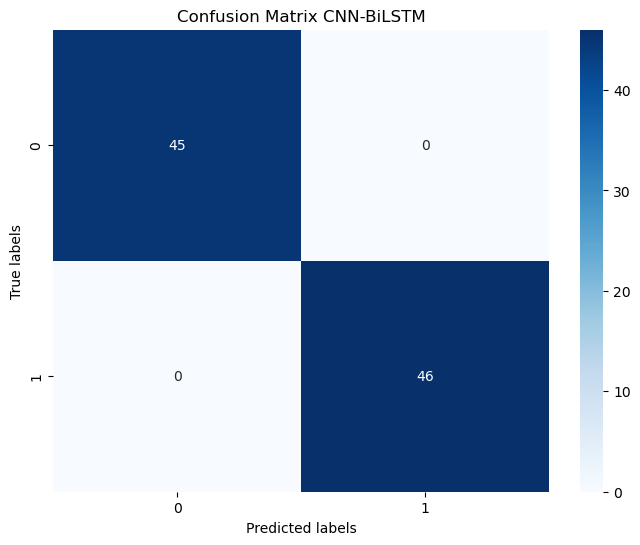

In [70]:
confusion_matrix_cnn_bilstm = confusion_matrix(y_test, predictions_cnn_bilstm)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_cnn, annot=True, cmap='Blues', fmt='d', cbar=True)

# Add labels, title, and ticks
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix CNN-BiLSTM')
plt.xticks(ticks=np.arange(len(confusion_matrix_cnn_bilstm))+0.5, labels=np.unique(y_test))
plt.yticks(ticks=np.arange(len(confusion_matrix_cnn_bilstm))+0.5, labels=np.unique(y_test))
plt.show()

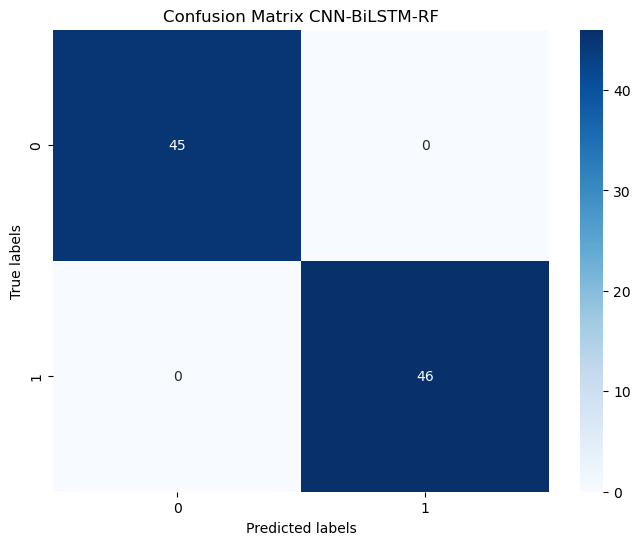

In [71]:
confusion_matrix_cnn_bilstm_rf = confusion_matrix(y_test, predictions_cnn_bilstm_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_cnn, annot=True, cmap='Blues', fmt='d', cbar=True)

# Add labels, title, and ticks
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix CNN-BiLSTM-RF')
plt.xticks(ticks=np.arange(len(confusion_matrix_cnn_bilstm_rf))+0.5, labels=np.unique(y_test))
plt.yticks(ticks=np.arange(len(confusion_matrix_cnn_bilstm_rf))+0.5, labels=np.unique(y_test))
plt.show()

In [72]:
accuracy = accuracy_score(y_test,predictions_cnn_bilstm_rf)
print("Accuracy: ", accuracy)

Accuracy:  0.989010989010989


In [73]:
accuracy = accuracy_score(y_test,predictions_cnn_bilstm_rf)
print("Accuracy: ", accuracy)

Accuracy:  0.989010989010989


In [74]:
precision = precision_score(y_test, predictions_cnn_bilstm_rf)
print("Precision: ", precision)

Precision:  0.9787234042553191


In [75]:
recall = recall_score(y_test, predictions_cnn_bilstm_rf)
print("Recall: ", recall)

Recall:  1.0


In [76]:
precision_f1 = precision_score(y_test, predictions_cnn_bilstm_rf)
recall_f1 = recall_score(y_test, predictions_cnn_bilstm_rf)

f1_score = 2 * (precision_f1 * recall_f1) / (precision_f1 + recall_f1)

print("F1-Score: ", f1_score)

F1-Score:  0.989247311827957


In [77]:
roc_auc_value = roc_auc_score(y_test, predictions_cnn_bilstm_rf)
print("ROC AUC Score:", roc_auc_value)

ROC AUC Score: 0.9888888888888888


### 2) Loss/Accuracy Analysis Of DL Models

In [78]:
# Calculate performance metrics for CNN model
accuracy_cnn = accuracy_score(y_test, predictions_cnn)
precision_cnn = precision_score(y_test, predictions_cnn)
confusion_matrix_cnn = confusion_matrix(y_test, predictions_cnn)
# Calculate F1-score for CNN model
precision_cnn_f1 = precision_score(y_test, predictions_cnn)
recall_cnn_f1 = recall_score(y_test, predictions_cnn)

f1_score_cnn = 2 * (precision_cnn_f1 * recall_cnn_f1) / (precision_cnn_f1 + recall_cnn_f1)

# Extracting values
TP = confusion_matrix_cnn[1][1]  # True Positives
FN = confusion_matrix_cnn[1][0]  # False Negatives
TN = confusion_matrix_cnn[0][0]  # True Negatives
FP = confusion_matrix_cnn[0][1]  # False Positives

# Calculating Sensitivity (Recall) and Specificity
sensitivity_cnn = TP / (TP + FN)
specificity_cnn = TN / (TN + FP)

print("Accuracy_CNN: ",accuracy_cnn)
print("Precision_CNN: ",precision_cnn)
print("Sensitivity _CNN: ",sensitivity_cnn)
print("F1-Score_CNN: ",f1_score_cnn)
print("Specificity_CNN: ",specificity_cnn)

Accuracy_CNN:  1.0
Precision_CNN:  1.0
Sensitivity _CNN:  1.0
F1-Score_CNN:  1.0
Specificity_CNN:  1.0


In [79]:
# Calculate performance metrics for BiLSTM model
accuracy_bilstm = accuracy_score(y_test, predictions_bilstm)
precision_bilstm = precision_score(y_test, predictions_bilstm)
confusion_matrix_bilstm = confusion_matrix(y_test, predictions_bilstm)

# Calculate F1-score for CNN model
precision_bilstm_f1 = precision_score(y_test, predictions_cnn)
recall_bilstm_f1 = recall_score(y_test, predictions_cnn)

f1_score_bilstm = 2 * (precision_bilstm_f1 * recall_bilstm_f1) / (precision_bilstm_f1 + recall_bilstm_f1)

# Extracting values
TP = confusion_matrix_bilstm[1][1]  # True Positives
FN = confusion_matrix_bilstm[1][0]  # False Negatives
TN = confusion_matrix_bilstm[0][0]  # True Negatives
FP = confusion_matrix_bilstm[0][1]  # False Positives

# Calculating Sensitivity (Recall) and Specificity
sensitivity_bilstm = TP / (TP + FN)
specificity_bilstm = TN / (TN + FP)

print("Accuracy_BiLSTM: ",accuracy_bilstm)
print("Precision_BiLSTM: ",precision_bilstm)
print("Sensitivity _BiLSTM: ",sensitivity_bilstm)
print("F1-Score_BiLSTM: ",f1_score_cnn)
print("Specificity_BiLSTM: ",specificity_bilstm)

Accuracy_BiLSTM:  1.0
Precision_BiLSTM:  1.0
Sensitivity _BiLSTM:  1.0
F1-Score_BiLSTM:  1.0
Specificity_BiLSTM:  1.0


In [80]:
# Calculate performance metrics for CNN-BiLSTM model
accuracy_cnn_bilstm = accuracy_score(y_test, predictions_cnn_bilstm)
precision_cnn_bilstm = precision_score(y_test, predictions_cnn_bilstm)
confusion_matrix_cnn_bilstm = confusion_matrix(y_test, predictions_cnn_bilstm)

# Calculate F1-score for CNN model
precision_cnn_bilstm_f1 = precision_score(y_test, predictions_cnn)
recall_cnn_bilstm_f1 = recall_score(y_test, predictions_cnn)

f1_score_cnn_bilstm = 2 * (precision_cnn_bilstm_f1 * recall_cnn_bilstm_f1) / (precision_cnn_bilstm_f1 + recall_cnn_bilstm_f1)

# Extracting values
TP = confusion_matrix_cnn_bilstm[1][1]  # True Positives
FN = confusion_matrix_cnn_bilstm[1][0]  # False Negatives
TN = confusion_matrix_cnn_bilstm[0][0]  # True Negatives
FP = confusion_matrix_cnn_bilstm[0][1]  # False Positives

# Calculating Sensitivity (Recall) and Specificity
sensitivity_cnn_bilstm = TP / (TP + FN)
specificity_cnn_bilstm = TN / (TN + FP)

print("Accuracy_CNN_BiLSTM: ",accuracy_cnn_bilstm)
print("Precision_CNN_BiLSTM: ",precision_cnn_bilstm)
print("Sensitivity_CNN_BiLSTM: ",sensitivity_cnn_bilstm)
print("F1-Score_CNN_BiLSTM: ",f1_score_cnn_bilstm)
print("Specificity_CNN_BiLSTM: ",specificity_cnn_bilstm)

Accuracy_CNN_BiLSTM:  0.989010989010989
Precision_CNN_BiLSTM:  0.9787234042553191
Sensitivity_CNN_BiLSTM:  1.0
F1-Score_CNN_BiLSTM:  1.0
Specificity_CNN_BiLSTM:  0.9777777777777777


In [81]:
# Calculate performance metrics for CNN-BiLSTM-RF model
accuracy_cnn_bilstm_rf = accuracy_score(y_test, predictions_cnn_bilstm_rf)
precision_cnn_bilstm_rf = precision_score(y_test, predictions_cnn_bilstm_rf)
confusion_matrix_cnn_bilstm_rf = confusion_matrix(y_test, predictions_cnn_bilstm_rf)

# Calculate F1-score for CNN model
precision_cnn_bilstm_rf_f1 = precision_score(y_test, predictions_cnn)
recall_cnn_bilstm_rf_f1 = recall_score(y_test, predictions_cnn)

f1_score_cnn_bilstm_rf = 2 * (precision_cnn_bilstm_rf_f1 * recall_cnn_bilstm_rf_f1) / (precision_cnn_bilstm_rf_f1 + recall_cnn_bilstm_rf_f1)

# Extracting values
TP = confusion_matrix_cnn_bilstm_rf[1][1]  # True Positives
FN = confusion_matrix_cnn_bilstm_rf[1][0]  # False Negatives
TN = confusion_matrix_cnn_bilstm_rf[0][0]  # True Negatives
FP = confusion_matrix_cnn_bilstm_rf[0][1]  # False Positives

# Calculating Sensitivity (Recall) and Specificity
sensitivity_cnn_bilstm_rf = TP / (TP + FN)
specificity_cnn_bilstm_rf = TN / (TN + FP)

print("Accuracy_CNN_BiLSTM_RF: ",accuracy_cnn_bilstm_rf)
print("Precision_CNN_BiLSTM_RF: ",precision_cnn_bilstm_rf)
print("Sensitivity_CNN_BiLSTM_RF: ",sensitivity_cnn_bilstm_rf)
print("F1-Score_CNN_BiLSTM_RF: ",f1_score_cnn_bilstm_rf)
print("Specificity_CNN_BiLSTM_RF: ",specificity_cnn_bilstm_rf)

Accuracy_CNN_BiLSTM_RF:  0.989010989010989
Precision_CNN_BiLSTM_RF:  0.9787234042553191
Sensitivity_CNN_BiLSTM_RF:  1.0
F1-Score_CNN_BiLSTM_RF:  1.0
Specificity_CNN_BiLSTM_RF:  0.9777777777777777


In [82]:
# Results for each model
results = {
    'Model': ['CNN', 'BiLSTM', 'CNN-BiLSTM', 'CNN-BiLSTM-RF'],
    'Accuracy': [accuracy_cnn, accuracy_bilstm, accuracy_cnn_bilstm, accuracy_cnn_bilstm_rf],
    'Precision': [precision_cnn, precision_bilstm, precision_cnn_bilstm, precision_cnn_bilstm_rf],
    'sensitivity': [sensitivity_cnn, sensitivity_bilstm, sensitivity_cnn_bilstm, sensitivity_cnn_bilstm_rf],
    'F1 Score': [f1_score_cnn, f1_score_bilstm, f1_score_cnn_bilstm, f1_score_cnn_bilstm_rf],
    'Specificity': [specificity_cnn, specificity_bilstm, specificity_cnn_bilstm, specificity_cnn_bilstm_rf]
}

# Create DataFrame
results_df = pd.DataFrame(results)

# Display DataFrame
results_df

,Model,Accuracy,Precision,sensitivity,F1 Score,Specificity
0,CNN,1.000000,1.000000,1.0,1.0,1.000000
1,BiLSTM,1.000000,1.000000,1.0,1.0,1.000000
2,CNN-BiLSTM,0.989011,0.978723,1.0,1.0,0.977778
3,CNN-BiLSTM-RF,0.989011,0.978723,1.0,1.0,0.977778


### 3) ROC CURVE ANALYSIS

In [83]:
def learning_curve (history_CNN, epoch):
    #training vs validation accuracy
    epoch_range = range (1, epoch+1)
    plt.figure(figsize=(8, 5))
    plt.plot(epoch_range, history_CNN.history['accuracy'])
    plt.plot(epoch_range, history_CNN.history['val_accuracy'])
    plt.title('Training and Validation Accuracy of CNN')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Training Accuracy', 'validation Accuracy'], loc='lower right')
    plt.show()
    #training vs validation loss
    plt.figure(figsize=(8, 5))
    plt.plot(epoch_range, history_CNN.history['loss'])
    plt.plot(epoch_range, history_CNN.history['val_loss'])
    plt.title('Training and Validation Loss of CNN')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training Loss', 'validation Loss'], loc='upper right')
    plt.show()

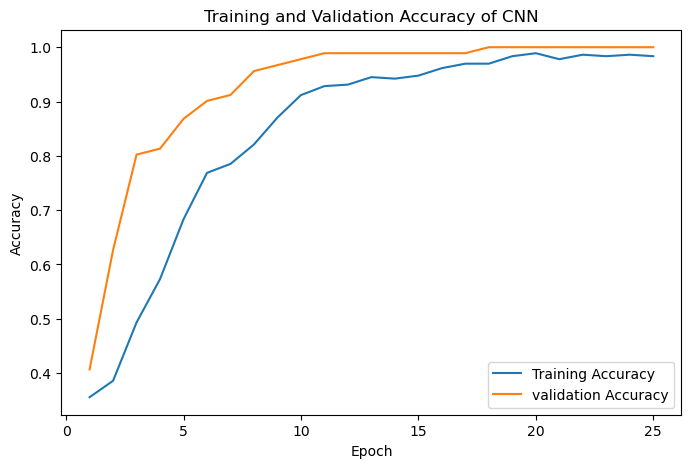

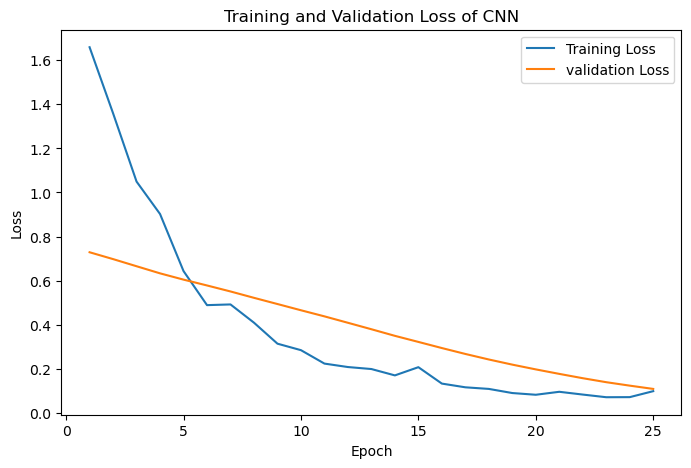

In [84]:
learning_curve(history_CNN, 25)

In [85]:
def learning_curve (history_BiLSTM, epoch):
    #training vs validation accuracy
    epoch_range = range (1, epoch+1)
    plt.figure(figsize=(8, 5))
    plt.plot(epoch_range, history_BiLSTM.history['accuracy'])
    plt.plot(epoch_range, history_BiLSTM.history['val_accuracy'])
    plt.title('Training and Validation Accuracy of BiLSTM')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Training Accuracy', 'validation Accuracy'], loc='lower right')
    plt.show()
    #training vs validation loss
    plt.figure(figsize=(8, 5))
    plt.plot(epoch_range, history_BiLSTM.history['loss'])
    plt.plot(epoch_range, history_BiLSTM.history['val_loss'])
    plt.title('Training and Validation Loss of BiLSTM')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training Loss', 'validation Loss'], loc='upper right')
    plt.show()

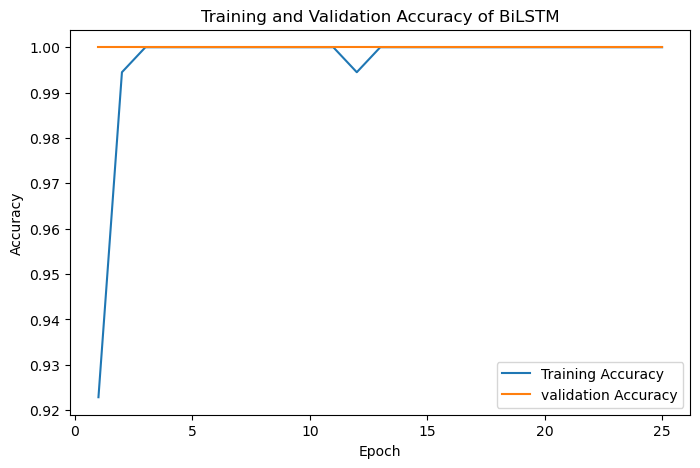

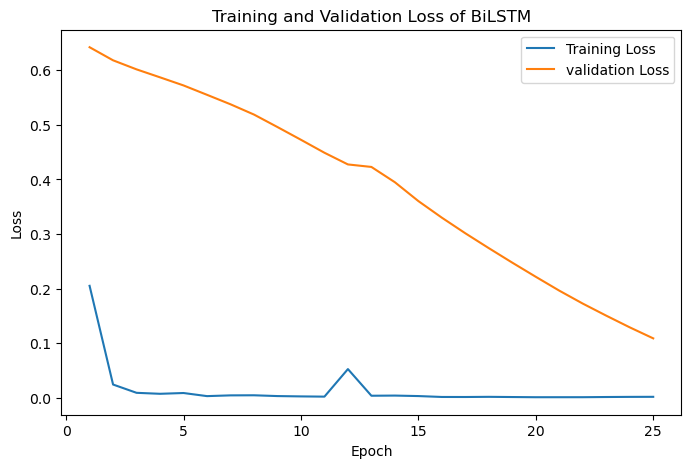

In [86]:
learning_curve(history_BiLSTM, 25)

In [87]:
def learning_curve(history_CNN_BiLSTM, epochs):
    # Determine the number of epochs
    epochs = len(history_CNN_BiLSTM.history['accuracy'])

    # Plot training vs validation accuracy
    epoch_range = range(1, epochs + 1)
    plt.figure(figsize=(8, 5))
    plt.plot(epoch_range, history_CNN_BiLSTM.history['accuracy'], label='Train Accuracy')
    plt.plot(epoch_range, history_CNN_BiLSTM.history['val_accuracy'], label='Validation Accuracy')

    plt.title('Training and Validation Accuracy of CNN-BiLSTM')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='lower right')
    plt.show()
    
    #training vs validation loss
    plt.figure(figsize=(8, 5))
    plt.plot(epoch_range, history_CNN_BiLSTM.history['loss'], label='Training Loss')
    plt.plot(epoch_range, history_CNN_BiLSTM.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss of CNN-BiLSTM')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training Loss', 'validation Loss'], loc='upper right')
    plt.show()

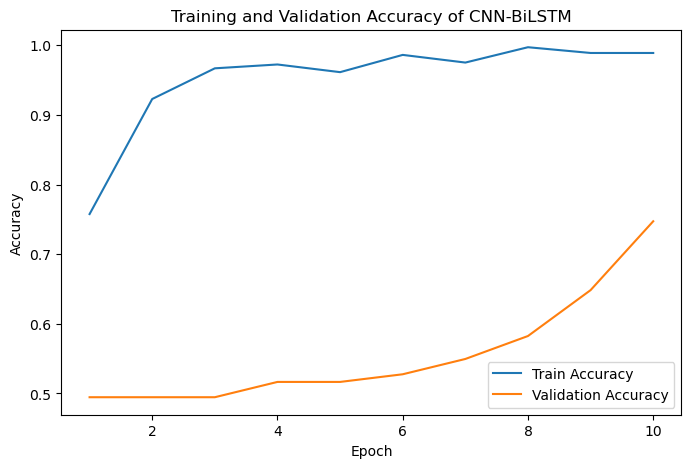

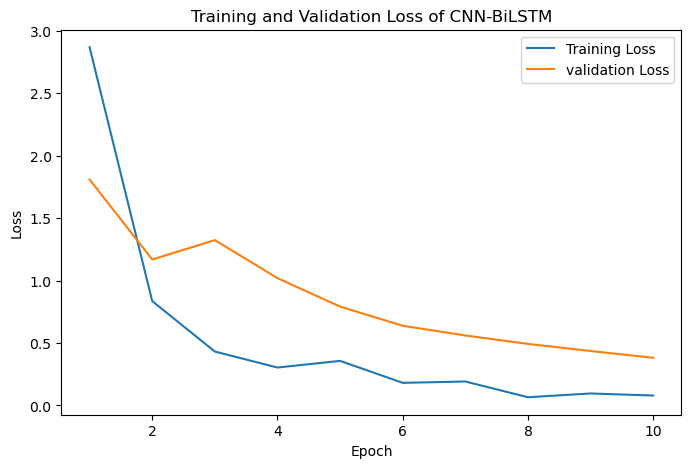

In [88]:
learning_curve(history_CNN_BiLSTM, 10)

In [89]:
def learning_curve(history_CNN_BiLSTM_RF, epochs):
    # Determine the number of epochs
    epochs = len(history_CNN_BiLSTM.history['accuracy'])

    # Plot training vs validation accuracy
    epoch_range = range(1, epochs + 1)
    plt.figure(figsize=(8, 5))
    plt.plot(epoch_range, history_CNN_BiLSTM_RF.history['accuracy'], label='Train Accuracy')
    plt.plot(epoch_range, history_CNN_BiLSTM_RF.history['val_accuracy'], label='Validation')

    plt.title('Training and Validation Accuracy of CNN-BiLSTM-RF')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='lower right')
    plt.show()
    
    #training vs validation loss
    plt.figure(figsize=(8, 5))
    plt.plot(epoch_range, history_CNN_BiLSTM_RF.history['loss'], label='Train Loss')
    plt.plot(epoch_range, history_CNN_BiLSTM_RF.history['val_loss'], label='Validation')
    plt.title('Training and Validation Loss of CNN-BiLSTM-RF')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Training Loss', 'Validation Loss'], loc='upper right')
    plt.show()

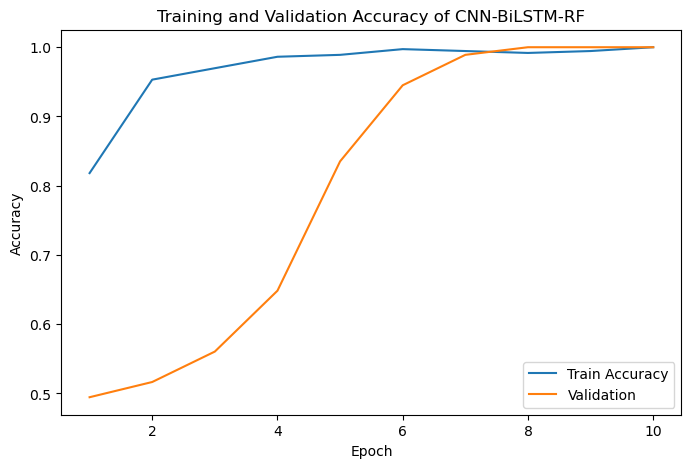

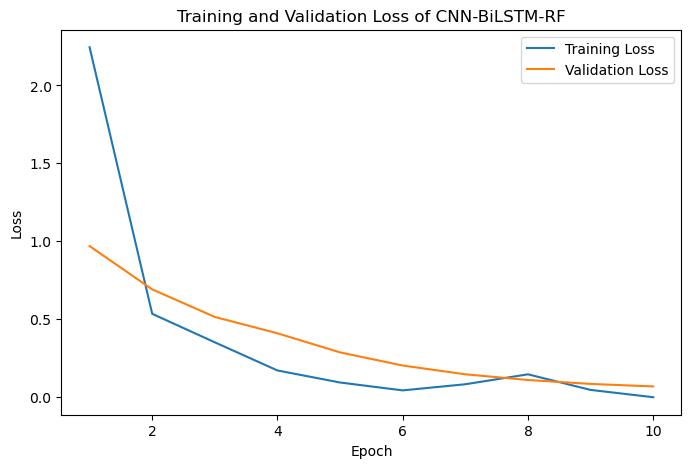

In [90]:
learning_curve(history_CNN_BiLSTM_RF, 10)

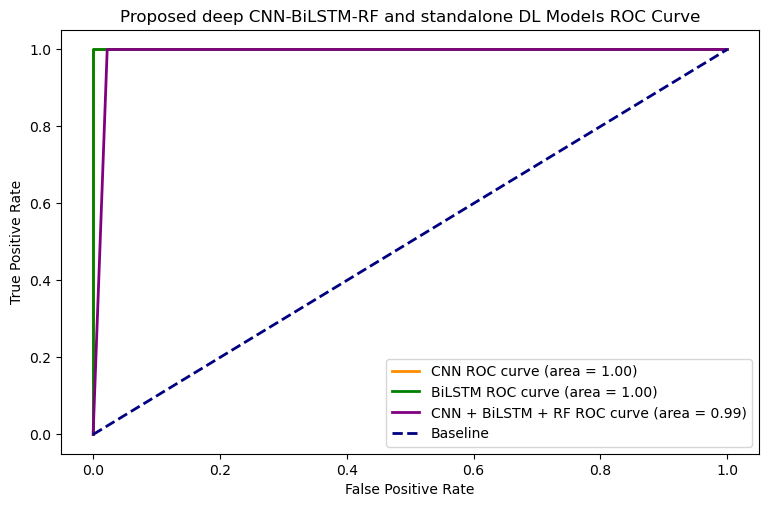

In [91]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate ROC curve and AUC for predictions_cnn
fpr_cnn, tpr_cnn, thresholds_cnn = roc_curve(y_test, predictions_cnn)
roc_auc_cnn = auc(fpr_cnn, tpr_cnn)

# Calculate ROC curve and AUC for predictions_bilstm
fpr_bilstm, tpr_bilstm, thresholds_bilstm = roc_curve(y_test, predictions_bilstm)
roc_auc_bilstm = auc(fpr_bilstm, tpr_bilstm)

# Calculate ROC curve and AUC for predictions_cnn_bilstm
fpr_cnn_bilstm, tpr_bilstm, thresholds_bilstm = roc_curve(y_test, predictions_cnn_bilstm)
roc_auc_cnn_bilstm = auc(fpr_bilstm, tpr_bilstm)

# Calculate ROC curve and AUC for predictions_cnn_bilstm_rf
fpr_cnn_bilstm_rf, tpr_cnn_bilstm_rf, thresholds_cnn_bilstm_rf = roc_curve(y_test, predictions_cnn_bilstm_rf)
roc_auc_cnn_bilstm_rf = auc(fpr_cnn_bilstm_rf, tpr_cnn_bilstm_rf)

plt.figure(figsize=(9, 5.5))

# Plot ROC curve for predictions_cnn
plt.plot(fpr_cnn, tpr_cnn, color='darkorange', lw=2, label='CNN ROC curve (area = %0.2f)' % roc_auc_cnn)

# Plot ROC curve for predictions_bilstm
plt.plot(fpr_bilstm, tpr_bilstm, color='green', lw=2, label='BiLSTM ROC curve (area = %0.2f)' % roc_auc_bilstm)

# Plot ROC curve for predictions_cnn_bilstm_rf
plt.plot(fpr_cnn_bilstm_rf, tpr_cnn_bilstm_rf, color='purple', lw=2, label='CNN + BiLSTM + RF ROC curve (area = %0.2f)' % roc_auc_cnn_bilstm_rf)

# Add baseline
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Baseline')

# Label axes and add title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Proposed deep CNN-BiLSTM-RF and standalone DL Models ROC Curve')

# Add legend
plt.legend(loc='lower right')

# Show plot
plt.show()

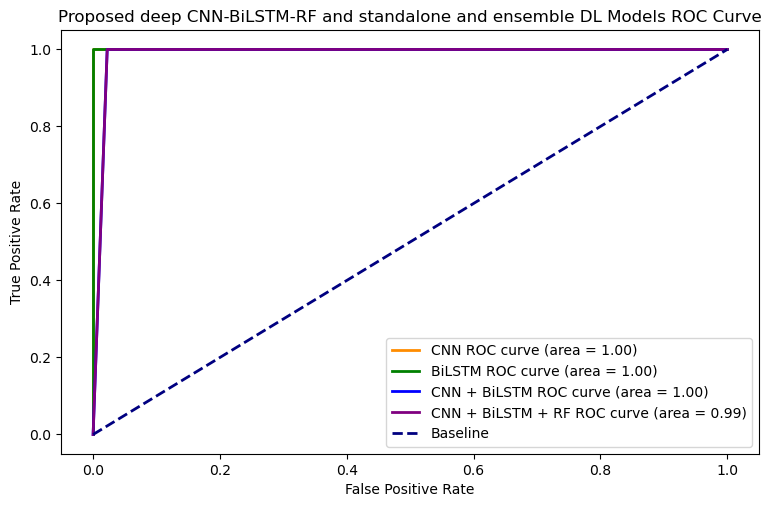

In [92]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate ROC curve and AUC for predictions_cnn
fpr_cnn, tpr_cnn, thresholds_cnn = roc_curve(y_test, predictions_cnn)
roc_auc_cnn = auc(fpr_cnn, tpr_cnn)

# Calculate ROC curve and AUC for predictions_bilstm
fpr_bilstm, tpr_bilstm, thresholds_bilstm = roc_curve(y_test, predictions_bilstm)
roc_auc_bilstm = auc(fpr_bilstm, tpr_bilstm)

# Calculate ROC curve and AUC for predictions_cnn_bilstm
fpr_cnn_bilstm, tpr_cnn_bilstm, thresholds_cnn__bilstm = roc_curve(y_test, predictions_cnn_bilstm)
roc_auc_cnn_bilstm = auc(fpr_bilstm, tpr_bilstm)

# Calculate ROC curve and AUC for predictions_cnn_bilstm_rf
fpr_cnn_bilstm_rf, tpr_cnn_bilstm_rf, thresholds_cnn_bilstm_rf = roc_curve(y_test, predictions_cnn_bilstm_rf)
roc_auc_cnn_bilstm_rf = auc(fpr_cnn_bilstm_rf, tpr_cnn_bilstm_rf)

plt.figure(figsize=(9, 5.5))

# Plot ROC curve for predictions_cnn
plt.plot(fpr_cnn, tpr_cnn, color='darkorange', lw=2, label='CNN ROC curve (area = %0.2f)' % roc_auc_cnn)

# Plot ROC curve for predictions_bilstm
plt.plot(fpr_bilstm, tpr_bilstm, color='green', lw=2, label='BiLSTM ROC curve (area = %0.2f)' % roc_auc_bilstm)

# plot ROC curve for predictions_cnn_bilstm
plt.plot(fpr_cnn_bilstm, tpr_cnn_bilstm, color='blue', lw=2, label='CNN + BiLSTM ROC curve (area = %0.2f)' % roc_auc_cnn_bilstm)

# Plot ROC curve for predictions_cnn_bilstm_rf
plt.plot(fpr_cnn_bilstm_rf, tpr_cnn_bilstm_rf, color='purple', lw=2, label='CNN + BiLSTM + RF ROC curve (area = %0.2f)' % roc_auc_cnn_bilstm_rf)

# Add baseline
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Baseline')

# Label axes and add title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Proposed deep CNN-BiLSTM-RF and standalone and ensemble DL Models ROC Curve')

# Add legend
plt.legend(loc='lower right')

# Show plot
plt.show()

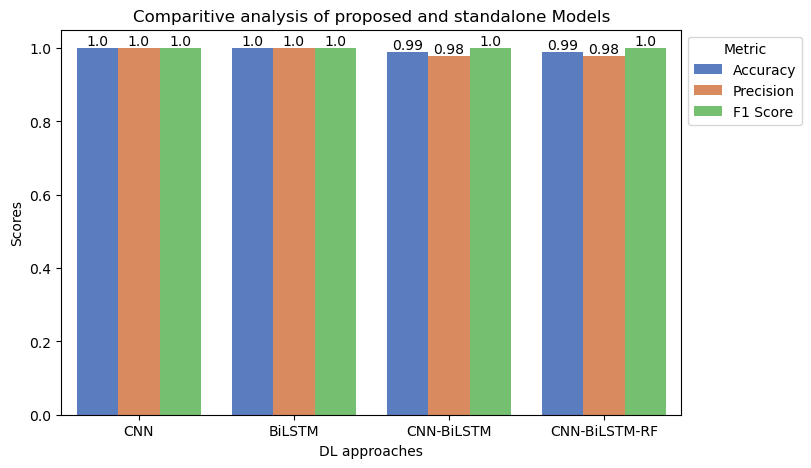

In [93]:
# Select only the attributes you want to display
attributes = ['Accuracy', 'Precision', 'F1 Score']

# Melt the DataFrame to reshape it for seaborn
df_melted = results_df.melt(id_vars='Model', value_vars=attributes, var_name='Metric', value_name='Score')

# Set the figure size
plt.figure(figsize=(8, 5))

# Create the clustered bar plot using seaborn
sns.barplot(data=df_melted, x='Model', y='Score', hue='Metric', palette='muted')

# Add labels and title
plt.xlabel('DL approaches')
plt.ylabel('Scores')
plt.title('Comparitive analysis of proposed and standalone Models')
plt.legend(title='Metric', bbox_to_anchor=(1.00, 1), loc='upper left')

# Add values on top of each bar
for p in plt.gca().patches:
    plt.gca().annotate(str(round(p.get_height(), 2)), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')


# Show the plot
plt.show()

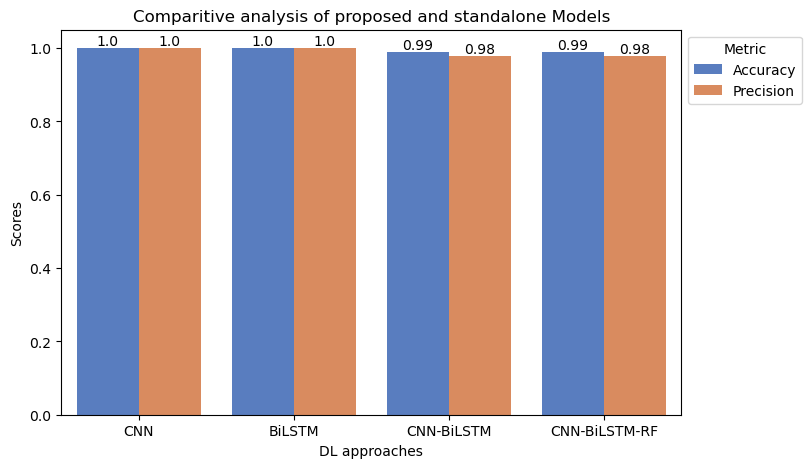

In [94]:
# Select only the attributes you want to display
attributes = ['Accuracy', 'Precision']

# Melt the DataFrame to reshape it for seaborn
df_melted = results_df.melt(id_vars='Model', value_vars=attributes, var_name='Metric', value_name='Score')

# Set the figure size
plt.figure(figsize=(8, 5))

# Create the clustered bar plot using seaborn
sns.barplot(data=df_melted, x='Model', y='Score', hue='Metric', palette='muted')

# Add labels and title
plt.xlabel('DL approaches')
plt.ylabel('Scores')
plt.title('Comparitive analysis of proposed and standalone Models')
plt.legend(title='Metric', bbox_to_anchor=(1.00, 1), loc='upper left')

# Add values on top of each bar
for p in plt.gca().patches:
    plt.gca().annotate(str(round(p.get_height(), 2)), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')


# Show the plot
plt.show()